## Dynamic Multipliers

This notebook reproduces figures 1.1 through 1.4 in James Hamilton's _Time Series Analysis_, which illustrate dynamic multipliers and difference equations.  See the book for details.

### First Order Difference Equations

This is a first order difference equation:

$$
y_{t} = \phi y_{t-1} + w_{t}
$$

So
$$
y_{0} = \phi y_{-1} + w_{0}
$$
and
$$
y_{1} = \phi y_{0} + w_{1} = \phi (\phi y_{-1} + w_{0}) + w_{1} = \phi^{2} y_{-1} + \phi w_{0} + w_{1}
$$
etc.  More generally:
$$
y_{t + j} = \phi^{j+1} y_{t-1} + \phi^{j} w_{t} + \phi^{j-1} w_{t+1} \dots + \phi w_{t+j-1} + w_{t+j}
$$

If there were a change to w_t without a change to any other w, the effect on the following y's is given by:

$$
\frac {\partial y_{t+j}}{\partial w_{t}} = \phi^{j}
$$

This quantity is called the _dynamic multiplier_.  

In [65]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np

df = pd.DataFrame([[j,0.8 ** j] for j in range(1,25)],
                  columns=('j', 'phi'))

df['phi2'] = [(-0.8) ** j for j in range(1, 25)]
df['phi3'] = [(1.1) ** j for j in range(1, 25)]
df['phi4'] = [(-1.1) ** j for j in range(1, 25)]

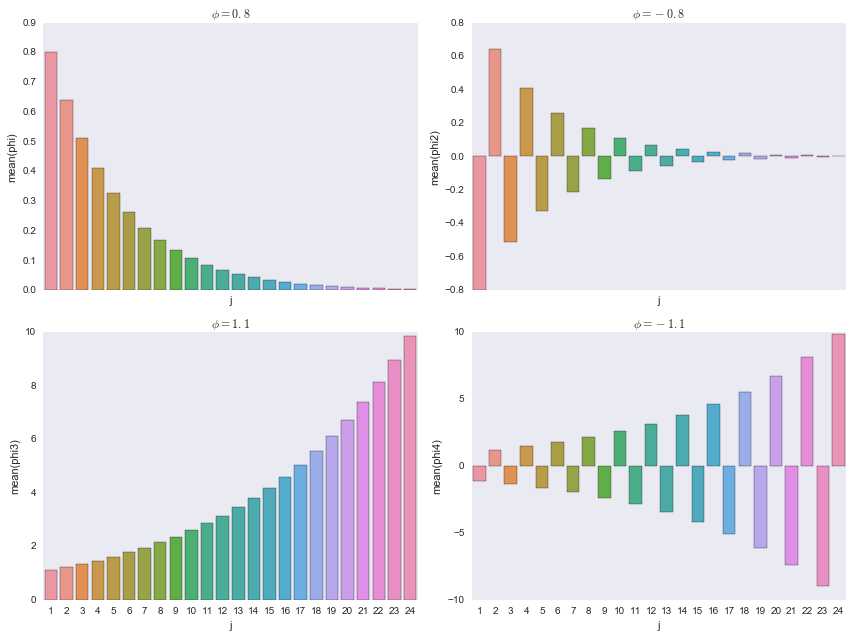

In [66]:
import matplotlib.pyplot as plt

sns.set(style="dark")

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(12, 9), sharex=True)

axes[0][0].set_title(r'$\phi = 0.8$')
g = sns.barplot(x='j', y='phi', data=df, ax=axes[0][0])
axes[0][1].set_title(r'$\phi = -0.8$')
g = sns.barplot(x='j', y='phi2', data=df, ax=axes[0][1])
axes[1][0].set_title(r'$\phi = 1.1$')
g = sns.barplot(x='j', y='phi3', data=df, ax=axes[1][0])
axes[1][1].set_title(r'$\phi = -1.1$')
g = sns.barplot(x='j', y='phi4', data=df, ax=axes[1][1])

f.tight_layout()

### Impulse-Response Functions

In [67]:
phi = 0.8
w = [1.0 if t==6 else 0.0 for t in range(20)]
y = [0] * 20
for t in range(1,20):
    y[t] = phi * y[t-1] + w[t]
df = pd.DataFrame({'t': range(20), 'w': w, 'y': y})

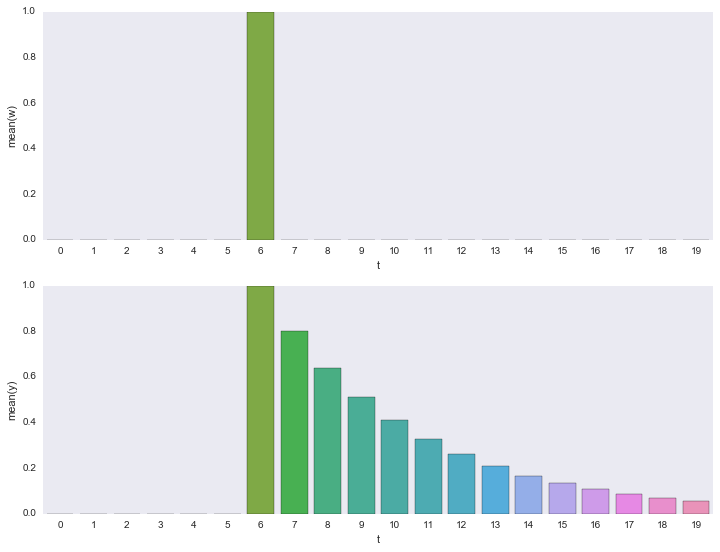

In [68]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 9), sharey=True)

g = sns.barplot(x='t', y='w', data=df, ax=ax1)
g = sns.barplot(x='t', y='y', data=df, ax=ax2)

In [69]:
phi = 0.8
w = [1.0 if t >= 6 else 0.0 for t in range(20)]
y = [0] * 20
for t in range(1,20):
    y[t] = phi * y[t-1] + w[t]
df = pd.DataFrame({'t': range(20), 'w': w, 'y': y})

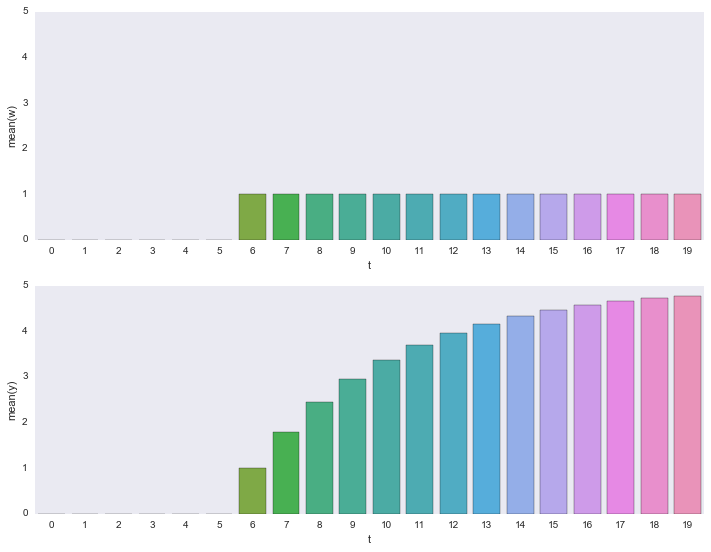

In [70]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 9), sharey=True)

g = sns.barplot(x='t', y='w', data=df, ax=ax1)
g = sns.barplot(x='t', y='y', data=df, ax=ax2)

### Second Order Difference Equations

In [71]:
l1, l2 = np.roots([1.0, -0.6, -0.2])

In [72]:
c1 = l1 / (l1 - l2)
c2 = l2 / (l2 - l1)
c1, c2

(0.7785430072655779, 0.22145699273442226)

In [73]:
y = [0] * 20
for t in range(1,20):
    y[t] = c1 * l1 ** (t - 1) + c2 * l2 ** (t - 1)
df = pd.DataFrame({'t': range(20), 'y': y})

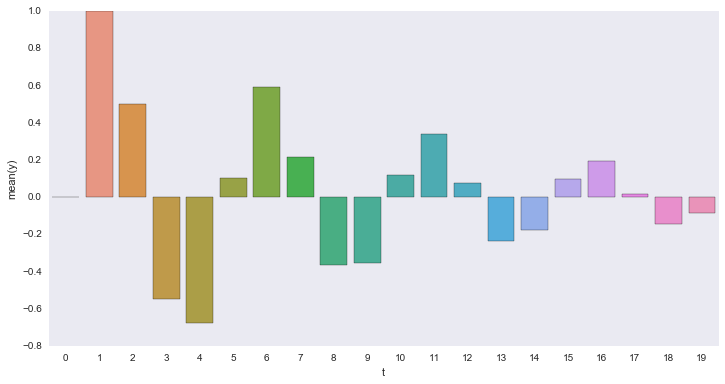

In [81]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='t', y='y', data=df)

In [75]:
l1, l2 = np.roots([1.0, -0.5, 0.8])

In [76]:
l1, l2

((0.25+0.85877820186588349j), (0.25-0.85877820186588349j))

In [77]:
c1i = l1 / (l1 - l2)
c2i = l2 / (l2 - l1)
c1i, c2i

((0.5-0.14555562743489547j), (0.5+0.14555562743489547j))

In [78]:
r = np.abs(l1)
alpha = np.real(c1i)
beta = np.imag(c1i)
theta = np.arccos(np.real(l1) / r)
r, alpha, beta, theta

(0.89442719099991597,
 array(0.5),
 array(-0.14555562743489547),
 1.2875141614843575)

In [79]:
y = [0] * 20
for t in range(1,20):
    y[t] = 2 * alpha * r ** (t - 1) * np.cos(theta * (t - 1)) - 2 * beta * r ** (t - 1) * np.sin(theta * (t - 1))
df = pd.DataFrame({'t': range(20), 'y': y})

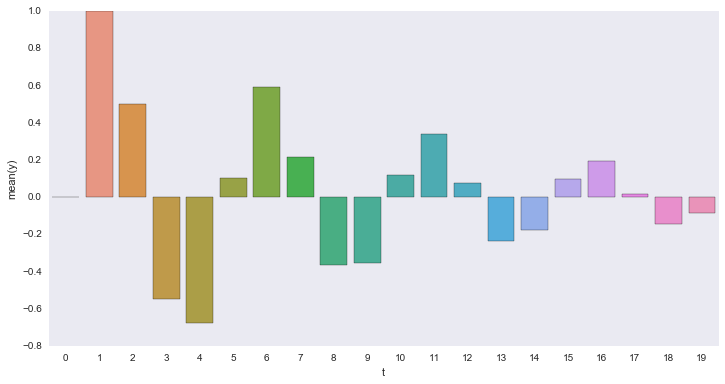

In [82]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='t', y='y', data=df)